# Prediction Breast Cancer Wisconsin_Using Machine Learning

## 01| Dataset Information

Informasi atribut:
- __ID number__
- __Diagnosis__ (M = malignant 'ganas', B = benign 'jinak')

Sepuluh fitur penting yg dihitung untuk setiap inti sel:
    
- __radius:__ Jari2 (rata-rata jarak dari pusat ke tepi)
- __texture:__ tekstur (standar deviasi nilai skala abu-abu)
- __perimeter:__ keliling
- __area:__ luas
- __smoothness:__ kehalusan (variasi lokal dalam panjang jari2)
- __compactness:__ kepadatan (keliling^2 / luas - 1.0)
- __concavity:__ kecekungan (tingkat keparahan bagian cekung dari kontur)
- __concave points:__ titik cekung (jumlah bagian cekung dari kontur)
- __symmetry:__ simetri
- __fractal dimension:__ dimensi fraktal ("perkiraan garis tepi" - 1)

## 02| Importing Library

In [2]:
# Library math and visual
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import seaborn as sns

# Library sklearn
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,mean_absolute_error, accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Library jcopml
from jcopml.tuning import random_search_params as rsp
from jcopml.tuning import grid_search_params as gsp
from jcopml.pipeline import num_pipe,cat_pipe
from jcopml.plot import plot_missing_value, plot_pr_curve
from jcopml.feature_importance import mean_score_decrease

from warnings import filterwarnings
filterwarnings('ignore')

## 03| Loading Dataset

In [3]:
#Breast cancer dataset
df = pd.read_csv('data.csv', index_col='id')
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

Karena terdapat kolom kosong ('Unnamed: 32') dan kolom diagnosis masih berbentuk karakter, kita handling dengan hapus kolom dan ubah nilai menjadi 1 = M, 0 = B.

In [4]:
# drop kolom 'unnamed : 32'
df.drop(columns='Unnamed: 32', inplace=True)

# ubah nilai dari kolom diagnosis
df.diagnosis = [1 if i == 'M' else 0 for i in df.diagnosis]

In [5]:
# Cek value 
df.diagnosis.unique()

array([1, 0], dtype=int64)

In [6]:
# Melihat missing value
frame = {
        'missing_value': df.isna().sum(),
        '%' : round(((df.isna().sum()/ df.shape[0])*100),2)
        }
mv = pd.DataFrame(frame, index=df.columns)
mv

,missing_value,%
diagnosis,0,0.0
radius_mean,0,0.0
texture_mean,0,0.0
perimeter_mean,0,0.0
area_mean,0,0.0
smoothness_mean,0,0.0
compactness_mean,0,0.0
concavity_mean,0,0.0
concave points_mean,0,0.0
symmetry_mean,0,0.0


<AxesSubplot:xlabel='id'>

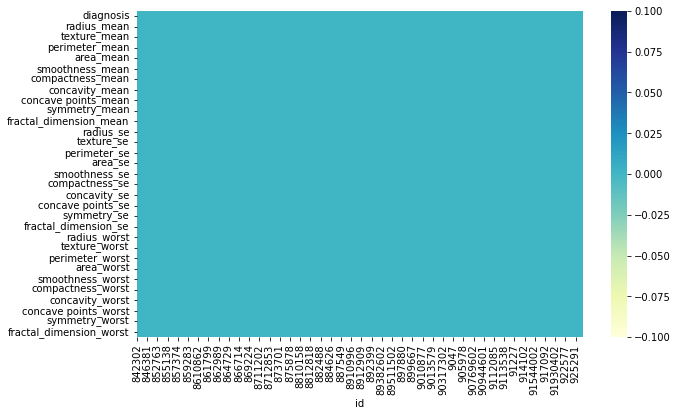

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().T, cmap="YlGnBu")

In [8]:
df.iloc[:,1:].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## 04| Exploratory Data Analysis (EDA)

#### A. Pemahaman Mendasar:
Secara sederhana, kanker jinak dan ganas bisa kita bedakan berdasarkan luas, teksture, dan kecekungan. Kanker merupakan sel abnormal yang tidak terkendali didalam tubuh khususnya bagian payudara. Secara kasat mata, kanker payudara dapat diamati dari gambar hasil mammografi (rontgen). Kanker dikatakan ganas ketika secara cepat berkembang dan merusak sel sehat. Hal tersebut digambarkan dengan luas area yg besar, tekstur lebih padat (memiliki warna abu  yg lebih mencolok) dan memiliki tingkat kecengungan yg berbeda (menunjukkan penyebaran dan rusaknya sel disekitarnya). Oleh karena itu, pada tahap ini saya akan menekankan eksplorasi pada tiga hal yaitu area, texture, dan concavity.

#### B. Gambaran Data

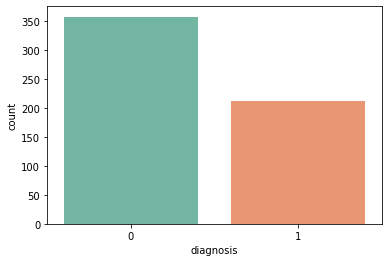

In [9]:
#Melihat jumlah target
sns.countplot(df.diagnosis, palette='Set2')
plt.show()

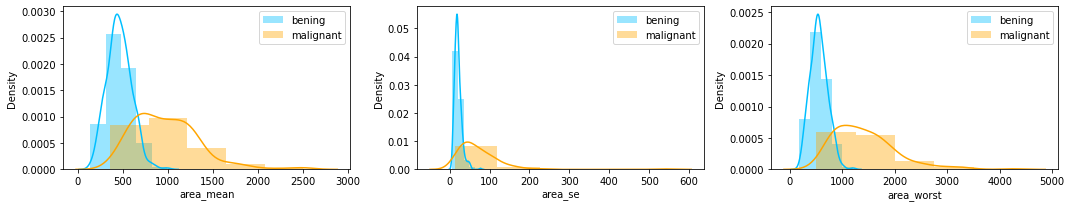

In [10]:
plt.figure(figsize=(15,3))
for i in enumerate(df[['area_mean','area_se','area_worst']]):
    plt.subplot(1,3, i[0]+1)
    sns.distplot(df[i[1]][df.diagnosis==0], bins=5, label='bening', color='deepskyblue')
    sns.distplot(df[i[1]][df.diagnosis==1], bins=5, label='malignant', color='orange')
    plt.legend()
plt.tight_layout()
plt.show()

Kanker ganas memiliki luas yg lebih besar dari pada kanker jinak.

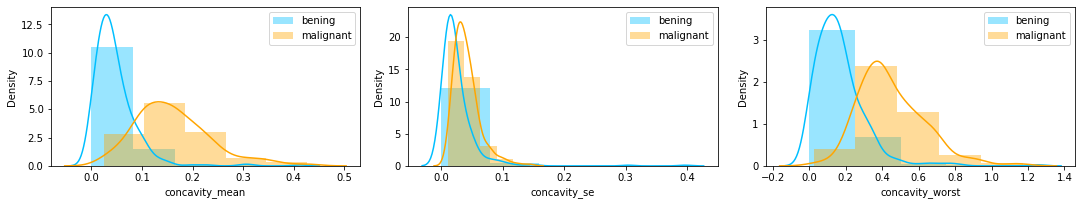

In [11]:
plt.figure(figsize=(15,3))
for i in enumerate(df[['concavity_mean','concavity_se','concavity_worst']]):
    plt.subplot(1,3, i[0]+1)
    sns.distplot(df[i[1]][df.diagnosis==0], bins=5, label='bening', color='deepskyblue')
    sns.distplot(df[i[1]][df.diagnosis==1], bins=5, label='malignant', color='orange')
    plt.legend()
plt.tight_layout()
plt.show()

Untuk kelengkungan dari sel kanker, kanker ganas lebih besar.

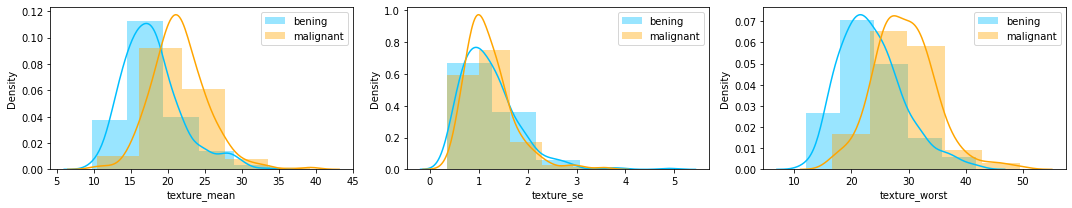

In [12]:
plt.figure(figsize=(15,3))
for i in enumerate(df[['texture_mean','texture_se','texture_worst']]):
    plt.subplot(1,3, i[0]+1)
    sns.distplot(df[i[1]][df.diagnosis==0], bins=5, label='bening', color='deepskyblue')
    sns.distplot(df[i[1]][df.diagnosis==1], bins=5, label='malignant', color='orange')
    plt.legend()
plt.tight_layout()
plt.show()

Texture atau warna abu2 dari kanker ganas cenderung lebih gelap.

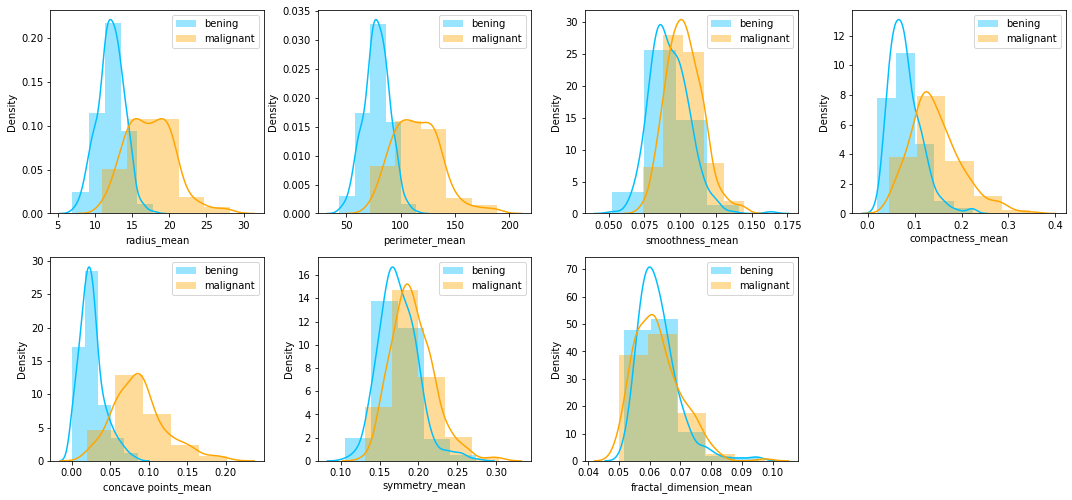

In [13]:
df_mean = df.iloc[:,:11]
plt.figure(figsize=(15,10))
for i in enumerate(df_mean.drop(columns=['diagnosis','concavity_mean','area_mean','texture_mean']).describe().columns):
    plt.subplot(3,4, i[0]+1)
    sns.distplot(df[i[1]][df.diagnosis==0], bins=5, label='bening', color='deepskyblue')
    sns.distplot(df[i[1]][df.diagnosis==1], bins=5, label='malignant', color='orange')
    plt.legend()
plt.tight_layout()
plt.show()

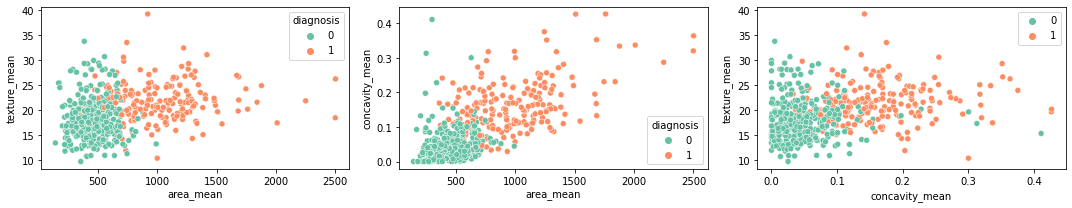

In [14]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
sns.scatterplot(x=df.area_mean, y=df.texture_mean, hue=df.diagnosis, palette='Set2')
plt.subplot(1,3,2)
sns.scatterplot(x=df.area_mean, y=df.concavity_mean, hue=df.diagnosis, palette='Set2')
plt.subplot(1,3,3)
sns.scatterplot(x=df.concavity_mean, y=df.texture_mean, hue=df.diagnosis, palette='Set2')
plt.legend()
plt.tight_layout()
plt.show()

Kanker ganas cenderung memiliki area dan kelengkungan yg lebih besar serta memiliki texture(warna abu) lebih pekat. Jika dilihat dari karakteristiknya, terdapat kecocokan dengan data. Untuk lebih jelasnya bisa dilihat ringkasan tabel dibawah. hal yg paling terlihat berbeda ialah dari segi anatomi sel. Sesuai dengan karakteristik sel kanker yaitu memiliki pertumbuhan abnormal dan cepat sehingga merusak jaringan disekitarnya.

In [15]:
#Grouping berdasarkan diagnosis
df_mean.diagnosis=df_mean.diagnosis.map({0:'Bening', 1:'Malignant'})
df_mean.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,,,,,,,,,,
Bening,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867
Malignant,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680


#### C. Feature Selection

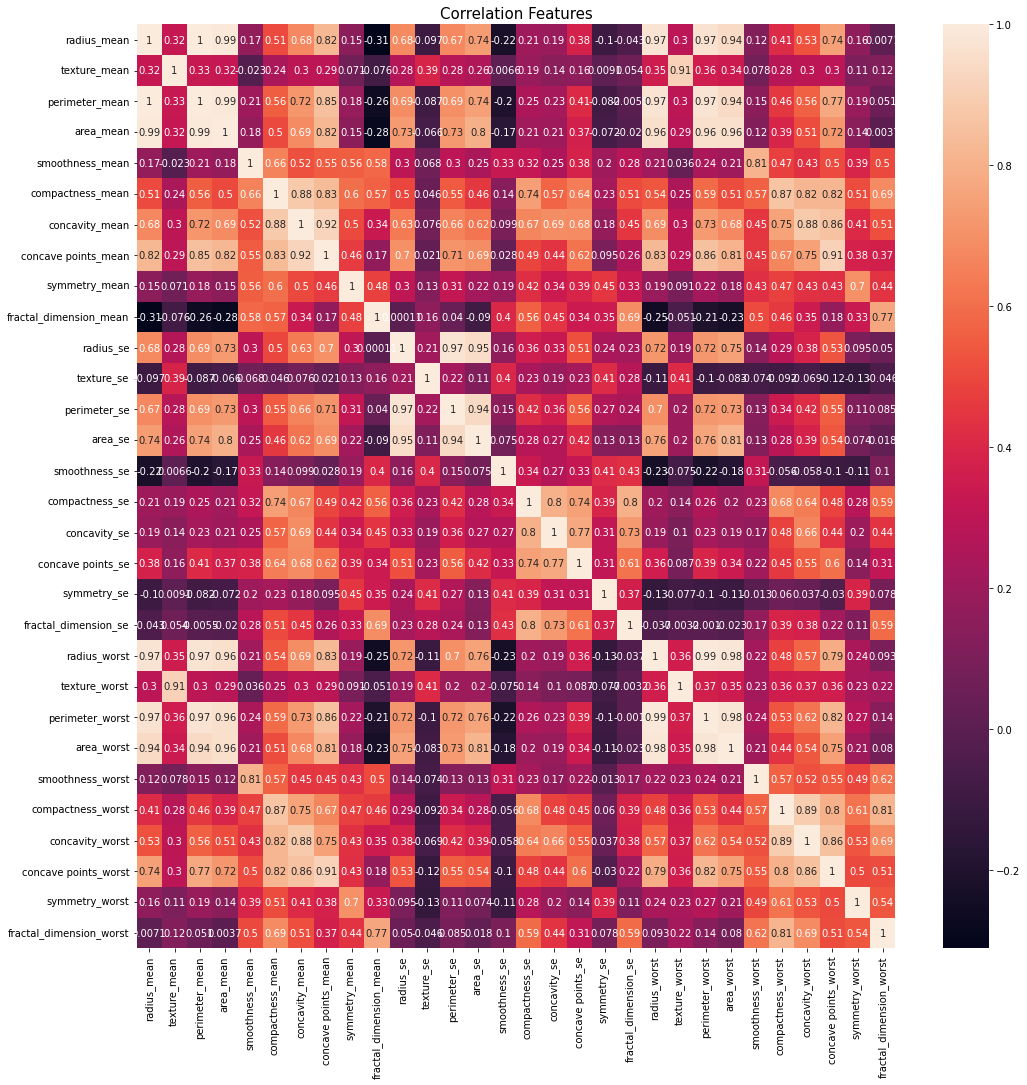

In [16]:
#Melihat korelasi dengan heatmap
plt.figure(figsize=(17,17))
sns.heatmap(df.drop(columns='diagnosis').corr(),annot=True)
plt.title('Correlation Features', fontsize=15)
plt.show()

Dari data diatas kita akan memilih fitur dengan korelasi diatas 0.8. Beberapa fitur dapat dilihat sebagai berikut:

In [17]:
#Memilih kolom dengan corr. > 0.8
col_selected = ['perimeter_mean','area_mean','radius_worst','perimeter_worst','area_worst','concave points_mean',
            'texture_worst','radius_mean','concavity_worst','compactness_mean','concave points_worst','concavity_mean',
            'perimeter_se','area_se','radius_se','fractal_dimension_se','concavity_se','compactness_se','texture_mean',
                'smoothness_mean','fractal_dimension_worst','compactness_worst']

#### D. Outliers

In [18]:
df_mean_out = df.iloc[:,1:11]
df_se_out = df.iloc[:,11:21]
df_worst_out = df.iloc[:,21:]

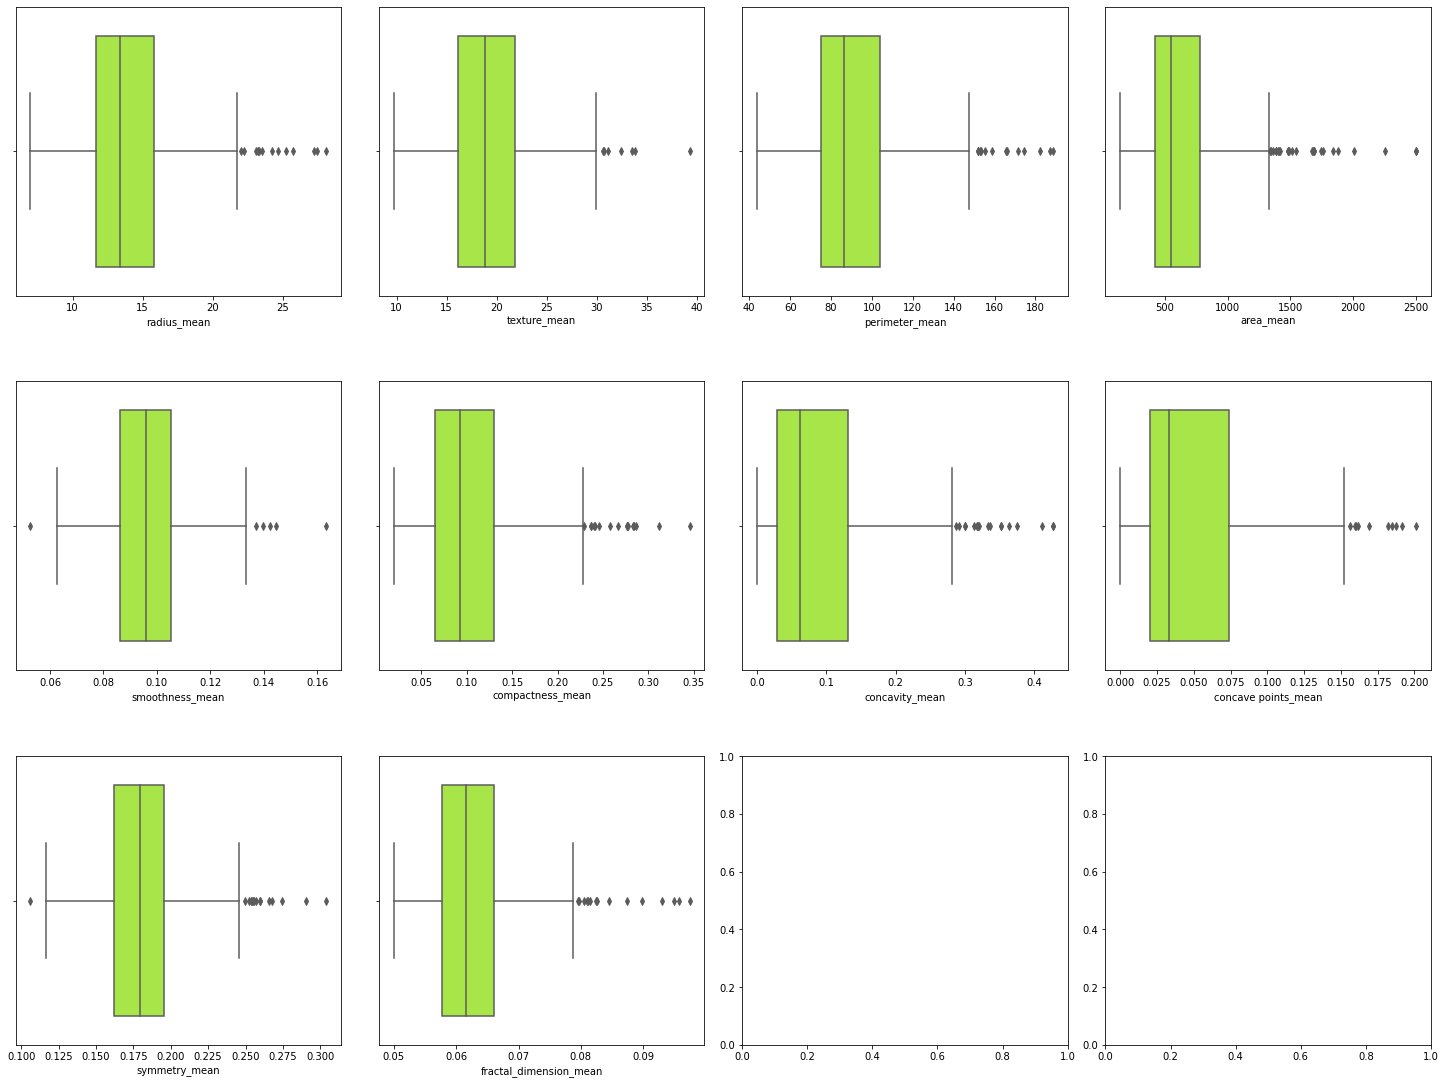

In [19]:
# Melihat outlier untuk features 'mean'
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(20,15))
index = 0
ax = ax.flatten()

for col, value in df_mean_out.items():
    sns.boxplot(x=col, data=df_mean_out, color='greenyellow', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

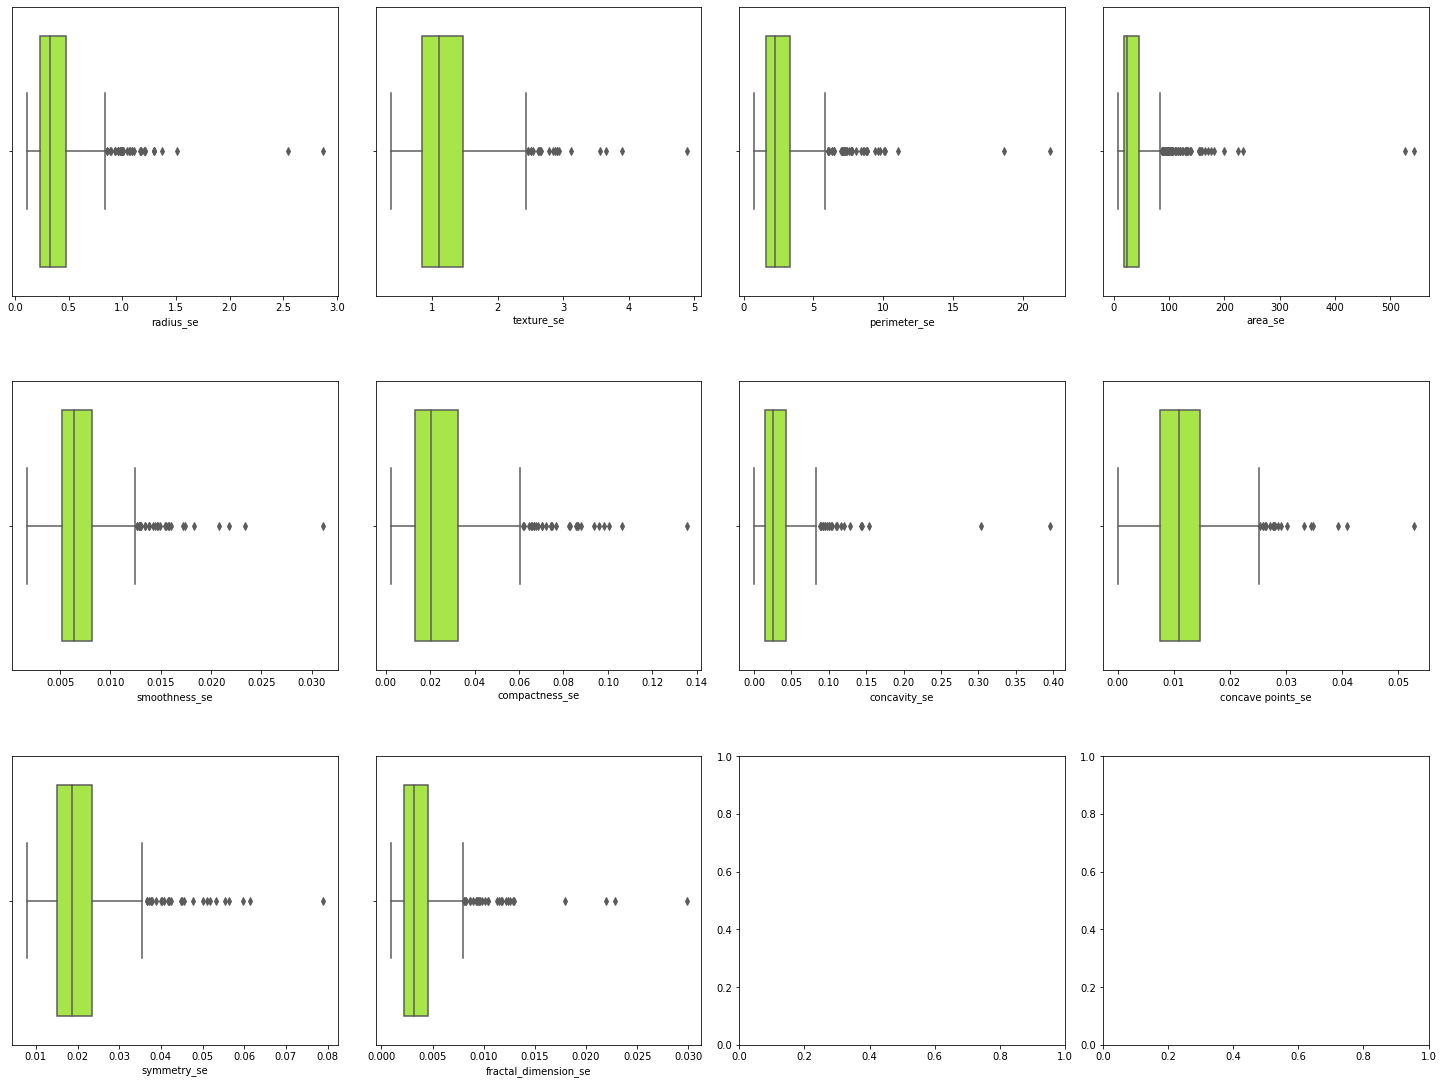

In [20]:
# Melihat outlier untuk features 'se'
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(20,15))
index = 0
ax = ax.flatten()

for col, value in df_se_out.items():
    sns.boxplot(x=col, data=df_se_out, color='greenyellow', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

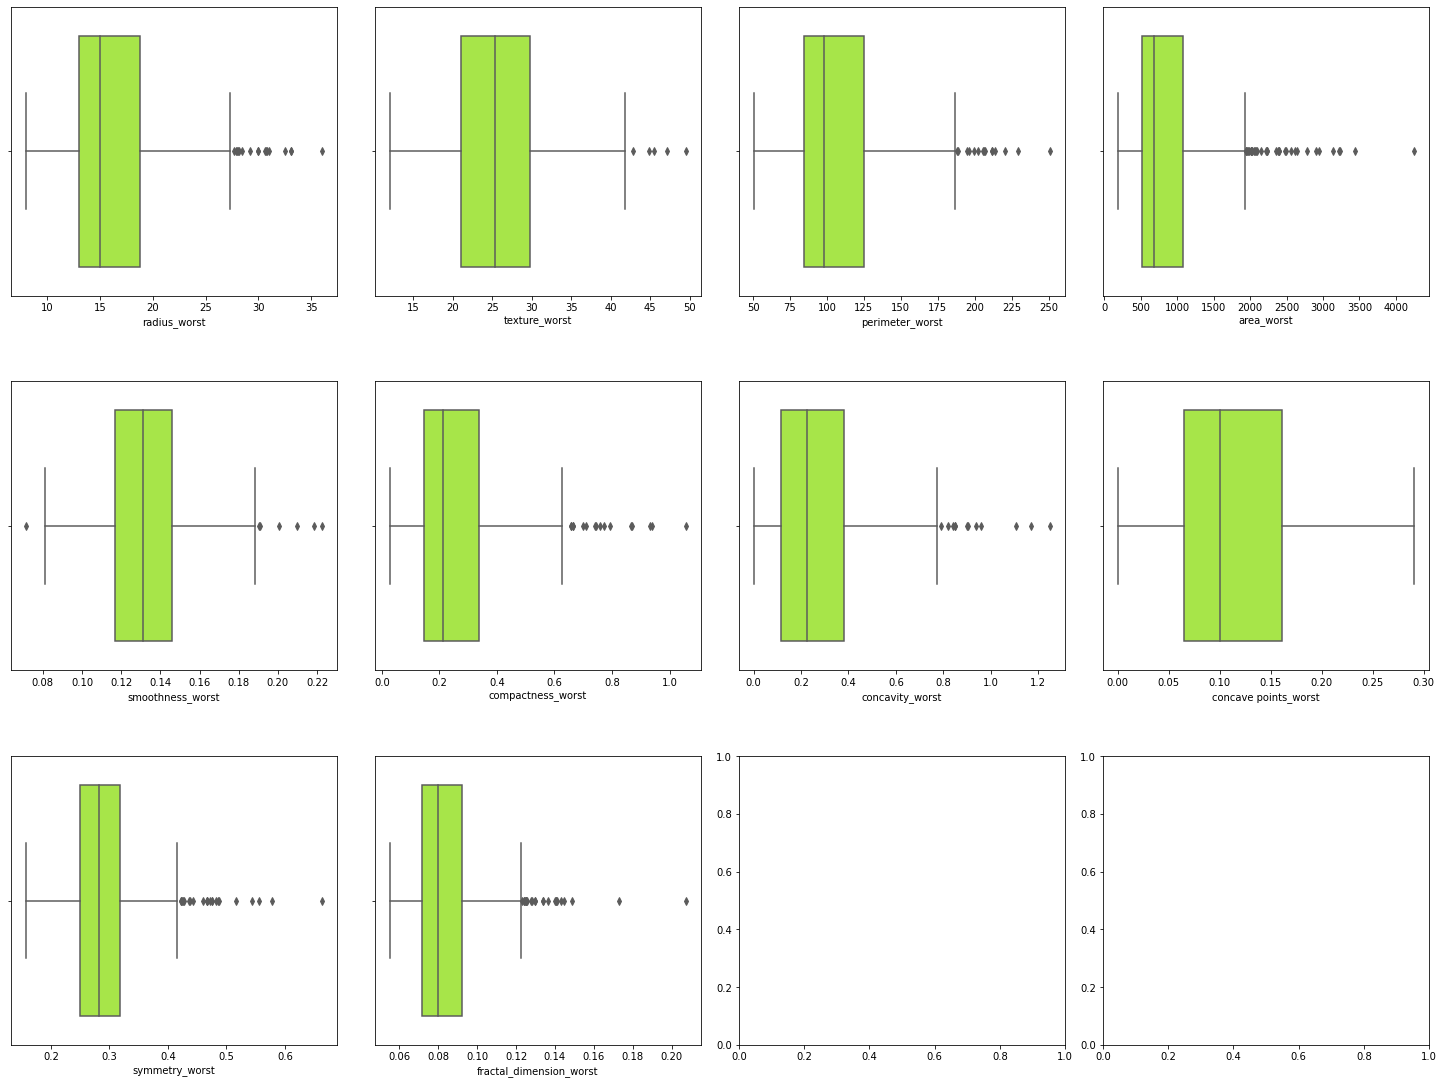

In [21]:
# Melihat outlier untuk features 'worst'
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(20,15))
index = 0
ax = ax.flatten()

for col, value in df_worst_out.items():
    sns.boxplot(x=col, data=df_worst_out, color='greenyellow', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Features cenderung memiliki distribusi skew kekanan. Pada kasus ini, outlier tidak dihandling.

## 05| Training and Evaluating Model 

In [22]:
#Splitting data
X = df.drop(columns='diagnosis')
y = df.diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

### A. XGBoost Model

###### 1) Menggunakan seluruh kolom

In [23]:
#Building dan tuning model XGBoost
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(),X_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])

xgb1 = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=5,n_iter=150, scoring='f1',n_jobs=-1, verbose=1, random_state=42)
xgb1.fit(X_train, y_train)

print(xgb1.best_params_)
print(xgb1.score(X_train, y_train), xgb1.best_score_, xgb1.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[08:55:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'algo__colsample_bytree': 0.6918516030703091, 'algo__gamma': 1, 'algo__learning_rate': 0.1216411342539395, 'algo__max_depth': 3, 'algo__n_estimators': 185, 'algo__reg_alpha': 0.011502956321912733, 'algo__reg_lambda': 0.009461469059966103, 'algo__subsample': 0.7865052773762229}
1.0 0.9611940298507463 0.9500000000000001


###### 2) Menggunakan kolom feature selection 

In [24]:
#Building dan tuning model XGBoost
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(),col_selected)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])

xgb2 = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=5,n_iter=150, scoring='f1',n_jobs=-1, verbose=1, random_state=42)
xgb2.fit(X_train, y_train)

print(xgb2.best_params_)
print(xgb2.score(X_train, y_train), xgb2.best_score_, xgb2.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[08:57:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'algo__colsample_bytree': 0.9174392973699884, 'algo__gamma': 3, 'algo__learning_rate': 0.22983221528155043, 'algo__max_depth': 5, 'algo__n_estimators': 143, 'algo__reg_alpha': 0.061820520641258085, 'algo__reg_lambda': 0.16276924772060908, 'algo__subsample': 0.5963483619396968}
0.9910979228486646 0.9613404549160552 0.962962962962963


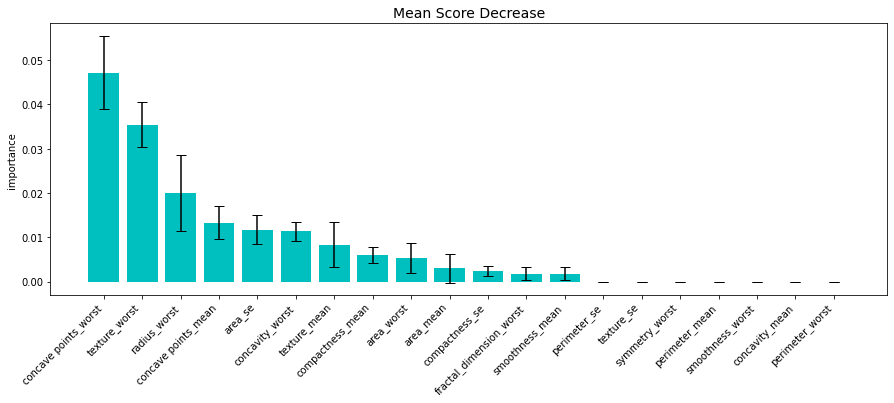

In [25]:
df_imp = mean_score_decrease(X_train, y_train, xgb2, plot=True, topk=20)

Pemilihan feature engineer berdasarkan perbedaan score mean score deacrease. Dalam hal ini, kita ambil feature sampai pada 'area_worst'

###### 3) Menggunakan kolom feature engginering

In [26]:
#Building dan tuning model XGBoost
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(),['concave points_worst','texture_worst','radius_worst',
                            'concave points_mean','area_se','concavity_worst',
                            'texture_mean','compactness_mean','area_worst'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])

xgb = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=5,n_iter=150, scoring='f1',n_jobs=-1, verbose=1, random_state=42)
xgb.fit(X_train, y_train)

print(xgb.best_params_)
print(xgb.score(X_train, y_train), xgb.best_score_, xgb.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[08:59:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'algo__colsample_bytree': 0.38804464092755064, 'algo__gamma': 3, 'algo__learning_rate': 0.060034839992196526, 'algo__max_depth': 9, 'algo__n_estimators': 118, 'algo__reg_alpha': 0.0023181776112903493, 'algo__reg_lambda': 0.018934530915191535, 'algo__subsample': 0.7750309835254026}
0.9821428571428572 0.9667914607564185 0.962962962962963


<AxesSubplot:>

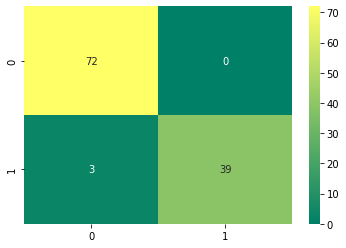

In [64]:
y_pred_xgb = xgb.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, cmap='summer')

In [56]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



Setelah dilakukan feature selection, feature enginering, dan tunning. hasil f1 score maksimal pada model XGBoost(xgb) adalah 96%

### B. Logistic Regression Model

###### 1) Menggunakan semua kolom

In [27]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='minmax'),X_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(n_jobs=-1))
])

logreg1 = GridSearchCV(pipeline, gsp.logreg_params, cv=3, scoring='f1',n_jobs=-1, verbose=1)
logreg1.fit(X_train, y_train)

print(logreg1.best_params_)
print(logreg1.score(X_train, y_train), logreg1.best_score_, logreg1.score(X_test, y_test))

Fitting 3 folds for each of 14 candidates, totalling 42 fits
{'algo__C': 10.0, 'algo__fit_intercept': True}
0.9700598802395209 0.966966966966967 0.975609756097561


###### 2) Menggunakan kolom feature selection

In [28]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='minmax'),col_selected)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(n_jobs=-1))
])

logreg2 = GridSearchCV(pipeline, gsp.logreg_params, cv=3, scoring='f1',n_jobs=-1, verbose=1)
logreg2.fit(X_train, y_train)

print(logreg2.best_params_)
print(logreg2.score(X_train, y_train), logreg2.best_score_, logreg2.score(X_test, y_test))

Fitting 3 folds for each of 14 candidates, totalling 42 fits
{'algo__C': 10.0, 'algo__fit_intercept': True}
0.966966966966967 0.9605752541532357 0.963855421686747


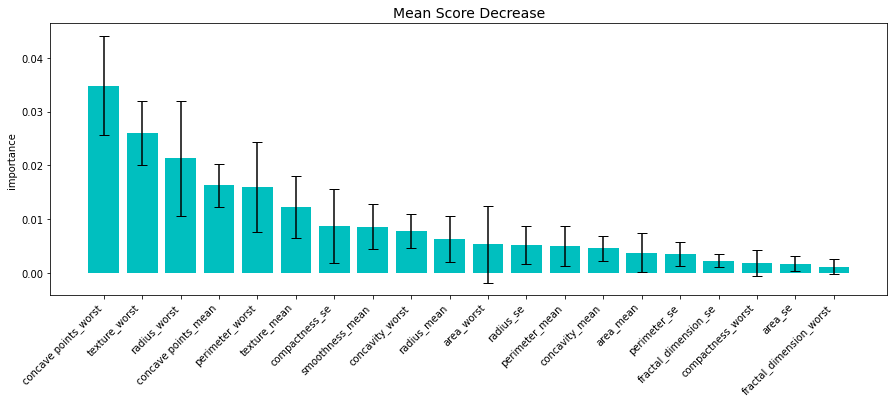

In [29]:
df_imp = mean_score_decrease(X_train, y_train, logreg2, plot=True, topk=20)

In [30]:
df_imp.feature.to_list()

['concave points_worst',
 'texture_worst',
 'radius_worst',
 'concave points_mean',
 'perimeter_worst',
 'texture_mean',
 'compactness_se',
 'smoothness_mean',
 'concavity_worst',
 'radius_mean',
 'area_worst',
 'radius_se',
 'perimeter_mean',
 'concavity_mean',
 'area_mean',
 'perimeter_se',
 'fractal_dimension_se',
 'compactness_worst',
 'area_se',
 'fractal_dimension_worst']

In [31]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='minmax'),['concave points_worst','texture_worst','radius_worst',
                                            'concave points_mean','perimeter_worst','texture_mean',
                                            'compactness_se','smoothness_mean','concavity_worst',
                                            'radius_mean','area_worst','radius_se','perimeter_mean',
                                            'concavity_mean','area_mean','perimeter_se'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(n_jobs=-1))
])

logreg = GridSearchCV(pipeline, gsp.logreg_params, cv=3, scoring='f1',n_jobs=-1, verbose=1)
logreg.fit(X_train, y_train)

print(logreg.best_params_)
print(logreg.score(X_train, y_train), logreg.best_score_, logreg.score(X_test, y_test))

Fitting 3 folds for each of 14 candidates, totalling 42 fits
{'algo__C': 10.0, 'algo__fit_intercept': True}
0.966966966966967 0.960904410904411 0.963855421686747


<AxesSubplot:>

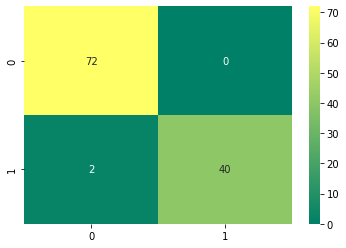

In [63]:
y_pred_logreg = logreg1.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, cmap='summer')

In [57]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Setelah dilakukan feature selection, feature enginering, dan tunning. hasil f1 score maksimal Logistic Regression (logreg1) adalah 97%

## 06| Conclusion

Setelah dilakukan training model, dapat diambil kesimpulan sebagai berikut:
1. Model XGBoost = Memiliki score F1 sebesar 96% dengan feature enginering dari training model menggunakan feature selection. Nama model adalah 'xgb'
2. Model Logistic Regression = Memiliki score F1 sebesar 97% dengan menggunakan seluruh feature. Nama model adalah 'logreg1'

by: muhamadsahri08@gmail.com